In [1]:
from google.colab.patches import cv2_imshow
import urllib.request
import numpy as np
import cv2 

In [2]:
def import_url_img(url):
  url_response = urllib.request.urlopen(url)
  return cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)


In [3]:
url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Sunflower_from_Silesia2.jpg"
img = import_url_img(url)
img = cv2.resize(img, (img.shape[1]//5, img.shape[0]//5))

# img = cv2.imread('./2.png')

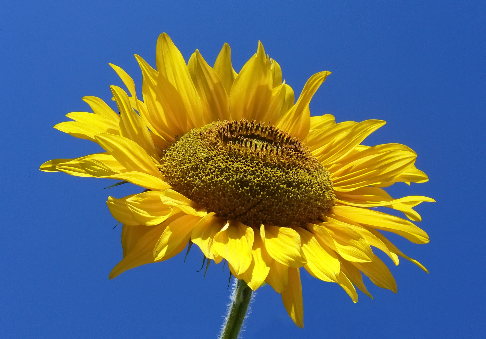

In [4]:
cv2_imshow(img)

In [5]:
training_image = img
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

test_image = cv2.pyrDown(training_image)
#test_image = cv2.pyrDown(test_image)
#test_image = training_image

# num_rows, num_cols = test_image.shape[:2]
# rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 47, 1)
# test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

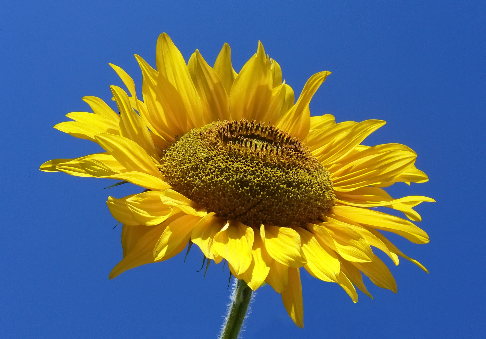

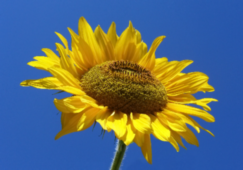

In [6]:
cv2_imshow(img)
cv2_imshow(test_image)

In [7]:
def fast_plus_brief(img_gray):
  fast = cv2.FastFeatureDetector_create() 
  brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

  keypoints = fast.detect(img_gray, None)
  keypoints, descriptor = brief.compute(img_gray, keypoints)

  return keypoints,descriptor

In [8]:
def bf_Matcher(train_descriptor, test_descriptor):
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
  matches = bf.match(train_descriptor, test_descriptor)
  return sorted(matches, key = lambda x : x.distance)

In [9]:
def custom_matcher(descs1, descs2):
  matches = []
  for i, k1 in enumerate(descs1):
    for j, k2 in enumerate(descs2):
      matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
  return sorted(matches, key = lambda x : x.distance)

In [10]:
train_keypoints, train_descriptor = fast_plus_brief(training_gray)
test_keypoints, test_descriptor = fast_plus_brief(test_gray)

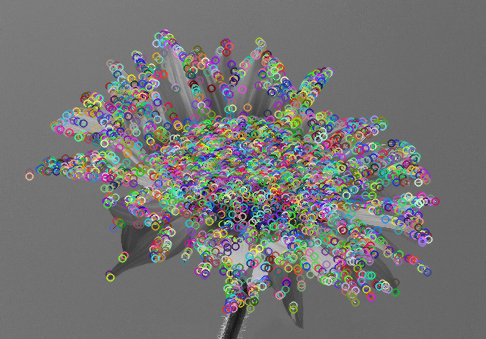

In [11]:
keypoints_img = cv2.drawKeypoints(training_gray, train_keypoints, training_gray, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(keypoints_img)

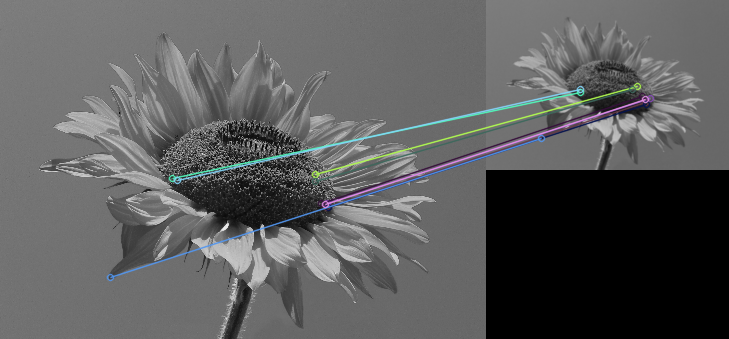

In [12]:
matches_1 = bf_Matcher(train_descriptor,test_descriptor)
result_1 = cv2.drawMatches(training_gray, train_keypoints, test_gray, test_keypoints, matches_1[:10], None, flags = 2)
cv2_imshow(result_1)

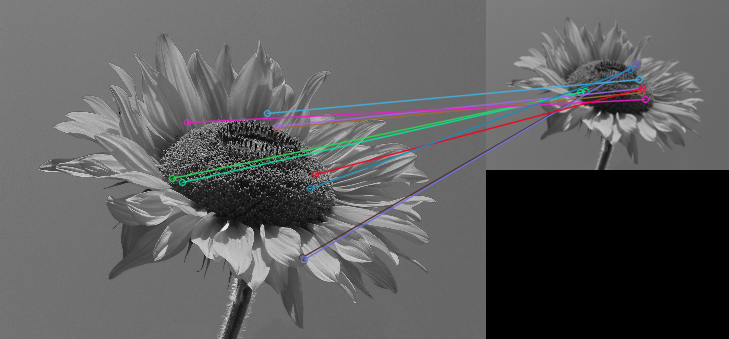

In [13]:
matches_2 = custom_matcher(train_descriptor, test_descriptor)
result_2 = cv2.drawMatches(training_gray, train_keypoints, test_gray, test_keypoints, matches_2[:10], test_gray,
                        flags=2)
cv2_imshow(result_2)